<a href="https://colab.research.google.com/github/AIhamade007/BankANNTraining/blob/main/FirstANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANN training.**

## **Loading the data set**

In [12]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Colab Notebooks/Churn_Modelling.csv'
df = pd.read_csv(file_path)
print(df.head())

x = df.iloc[:, 3:-1].values
y = df.iloc[:, -1].values

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  


## **Encoding non-numerical data**

In [13]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Gender Encoder
le = LabelEncoder()
x[:, 2] = le.fit_transform(x[:, 2])

#Geography Encoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

print(x[:5])

[[1.0 0.0 0.0 619 0 42 2 0.0 1 1 1 101348.88]
 [0.0 0.0 1.0 608 0 41 1 83807.86 1 0 1 112542.58]
 [1.0 0.0 0.0 502 0 42 8 159660.8 3 1 0 113931.57]
 [1.0 0.0 0.0 699 0 39 1 0.0 2 0 0 93826.63]
 [0.0 0.0 1.0 850 0 43 2 125510.82 1 1 1 79084.1]]


## **Splitting Data set for Training**

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

print("x train:")
print(x_train.shape)
print(x_train[:5])
print("x test:")
print(x_test.shape)
print(x_test[:5])
print("y train:")
print(y_train.shape)
print(y_train[:5])
print("y test:")
print(y_test.shape)
print(y_test[:5])

x train:
(8000, 12)
[[0.0 0.0 1.0 667 0 34 5 0.0 2 1 0 163830.64]
 [0.0 1.0 0.0 427 1 42 1 75681.52 1 1 1 57098.0]
 [1.0 0.0 0.0 535 0 29 2 112367.34 1 1 0 185630.76]
 [0.0 0.0 1.0 654 1 40 5 105683.63 1 1 0 173617.09]
 [0.0 0.0 1.0 850 0 57 8 126776.3 2 1 1 132298.49]]
x test:
(2000, 12)
[[0.0 1.0 0.0 597 0 35 8 131101.04 1 1 1 192852.67]
 [1.0 0.0 0.0 523 0 40 2 102967.41 1 1 0 128702.1]
 [0.0 0.0 1.0 706 0 42 8 95386.82 1 1 1 75732.25]
 [1.0 0.0 0.0 788 1 32 4 112079.58 1 0 0 89368.59]
 [0.0 1.0 0.0 706 1 38 5 163034.82 2 1 1 135662.17]]
y train:
(8000,)
[0 0 0 0 0]
y test:
(2000,)
[0 1 0 0 0]


## **Feature Scailing**

In [22]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

print("x train:")
print(x_train.shape)
print(x_train[:5])
print("x test:")
print(x_test.shape)
print(x_test[:5])

x train:
(8000, 12)
[[-1.01460667 -0.5698444   1.74309049  0.16958176 -1.09168714 -0.46460796
   0.00666099 -1.21571749  0.8095029   0.64259497 -1.03227043  1.10643166]
 [-1.01460667  1.75486502 -0.57369368 -2.30455945  0.91601335  0.30102557
  -1.37744033 -0.00631193 -0.92159124  0.64259497  0.9687384  -0.74866447]
 [ 0.98560362 -0.5698444  -0.57369368 -1.19119591 -1.09168714 -0.94312892
  -1.031415    0.57993469 -0.92159124  0.64259497 -1.03227043  1.48533467]
 [-1.01460667 -0.5698444   1.74309049  0.03556578  0.91601335  0.10961719
   0.00666099  0.47312769 -0.92159124  0.64259497 -1.03227043  1.27652776]
 [-1.01460667 -0.5698444   1.74309049  2.05611444 -1.09168714  1.73658844
   1.04473698  0.8101927   0.8095029   0.64259497  0.9687384   0.55837842]]
x test:
(2000, 12)
[[-1.01460667  1.75486502 -0.57369368 -0.55204276 -1.09168714 -0.36890377
   1.04473698  0.8793029  -0.92159124  0.64259497  0.9687384   1.61085707]
 [ 0.98560362 -0.5698444  -0.57369368 -1.31490297 -1.09168714  0.1

## **Building the ANN**

In [23]:
import tensorflow as tf

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(6, activation='relu'))
ann.add(tf.keras.layers.Dense(6, activation='relu'))
ann.add(tf.keras.layers.Dense(1, activation='sigmoid'))

## **Training the ANN**

In [24]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics= ['accuracy'])

ann.fit(x_train, y_train, batch_size= 32, epochs=100)

y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5452 - loss: 0.7947
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7975 - loss: 0.4734
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8060 - loss: 0.4385
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8129 - loss: 0.4296
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8194 - loss: 0.4187
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8194 - loss: 0.4161
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8298 - loss: 0.3896
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8308 - loss: 0.3961
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8359 - loss: 0.3837
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8395 - loss: 0.3769
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8522 - loss: 0.3626
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

## **Results**

[[1527   68]
 [ 213  192]]


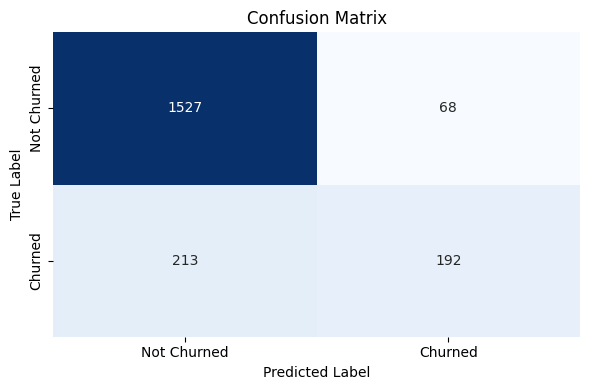

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

# Generate predictions and confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()
